In [ ]:
# 参考文献
# - https://zenn.dev/megane_otoko/articles/042_text_mining
# - https://colab.research.google.com/drive/1F6aFlaTXYCsZWsZs7rRDReqE7WpvB8PI?usp=sharing#scrollTo=3QansuaSxMtL

In [25]:
# setup
import requests
import pandas as pd
import numpy as np
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter

import japanize_matplotlib
import matplotlib.pyplot as plt

import itertools
from collections import Counter
import networkx as nx
%matplotlib inline


In [26]:
# fetch data
response_json = []
for i in range(10):
    json_url = 'https://crisis.yuiseki.net/api/news?country=%E6%97%A5%E6%9C%AC&category=poverty&limit=1000'
    json_url += f'&page={i+1}'
    print(i)
    response = requests.get(json_url)
    _response_json = response.json()
    if len(_response_json) == 0:
        break
    response_json += _response_json

response_json[0]

0
1


{'tags': ['poverty', 'drug_abuse'],
 '_id': '6117716c2fc92f71aa444b47',
 'url': 'https://news.yahoo.co.jp/articles/1e577c2e042b0c61c6bfc4f981cee1b2115eac43',
 '__v': 0,
 'category': 'poverty',
 'createdAt': '2021-08-14T07:31:56.159Z',
 'latitude': 32.097681,
 'longitude': 131.294542,
 'ogDesc': '\u3000前宮崎県知事でタレントの東国原英夫が14日、自身のツイッターを更新。生活保護受給者やホームレスに対する差別的な発言で批判を浴びたメンタリストDaiGoに対して“疑惑の目”を向けた。\n\n\u3000東国原は、',
 'ogImage': 'https://amd-pctr.c.yimg.jp/r/iwiz-amd/20210814-00000051-chuspo-000-3-view.jpg',
 'ogTitle': '東国原英夫「あの謝罪…実に疑わしい」DaiGoに“疑惑の目”「本質的に優生思想肯定論者なのだろう」（中日スポーツ） - Yahoo!ニュース',
 'ogUrl': 'https://news.yahoo.co.jp/articles/1e577c2e042b0c61c6bfc4f981cee1b2115eac43',
 'placeCity': None,
 'placeCountry': '日本',
 'placePref': '宮崎県',
 'sourceConfirmed': True,
 'sourceName': 'Yahoo!ニュース',
 'sourceType': 'ウェブニュース',
 'title': '東国原英夫「あの謝罪…実に疑わしい」DaiGoに“疑惑の目”「本質的に優生思想肯定論者なのだろう」（中日スポーツ） - Yahoo!ニュース',
 'updatedAt': '2021-08-14T10:30:21.066Z'}

In [39]:
# create networked data
# json to DataFrame
df = pd.DataFrame(response_json)
# ogTitleだけを使う
df = df['ogTitle']

token_filters = [
    POSKeepFilter(['名詞'])  # 名詞を抽出
]
analyzer = Analyzer(token_filters=token_filters)

noun_list = list([token.surface for token in analyzer.analyze(df[0])])
pair_list = list(itertools.combinations([n for n in noun_list if len(noun_list) >=2], 2))
cnt_pairs = Counter(pair_list)
tops = sorted(
    cnt_pairs.items(), 
    key=lambda x: x[1], reverse=True
    )[:500]

# 重み付きデータの生成
noun_1 = []
noun_2 = []
frequency = []

# データフレームの作成
for n,f in tops:
    noun_1.append(n[0])    
    noun_2.append(n[1])
    frequency.append(f)

df_G = pd.DataFrame({'前出名詞': noun_1, '後出名詞': noun_2, '出現頻度': frequency})
df_G

# 重み付きデータの設定
weighted_edges = np.array(df_G)

# グラフオブジェクトの生成
G = nx.Graph()

# 重み付きデータの読み込み
G.add_weighted_edges_from(weighted_edges)

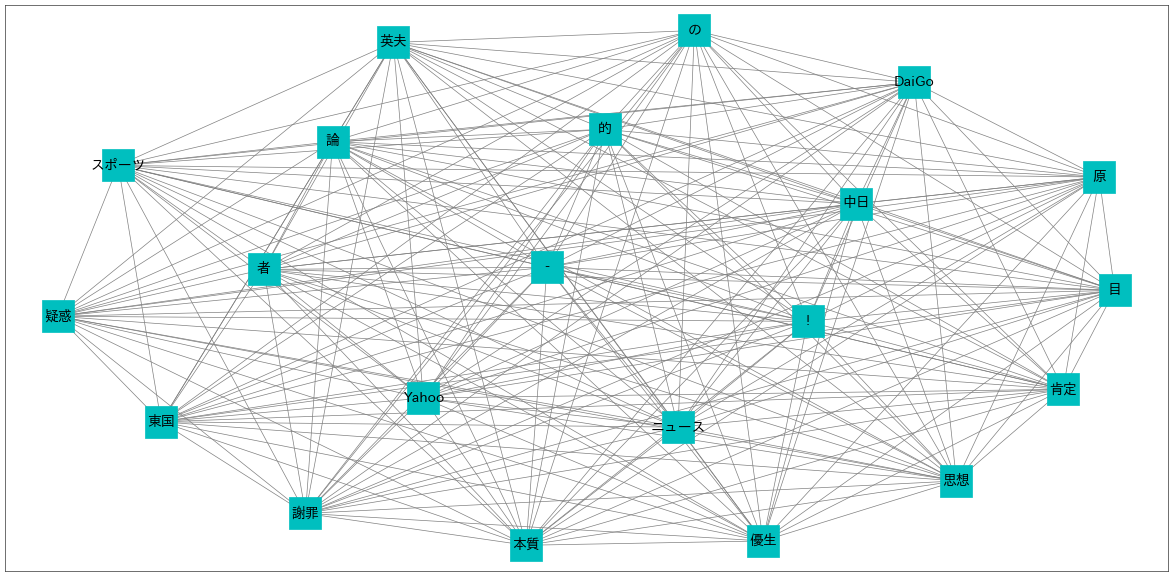

In [40]:
# ネットワーク図の描画
plt.figure(figsize=(30, 15), dpi=50)
nx.draw_networkx(G,
                 node_shape = "s",
                 node_color = "c", 
                 node_size = 2000,
                 edge_color = "gray", 
                 font_family = "IPAexGothic",
                 font_size = 20
);
plt.show()